# Import Library

In [1]:
import pandas as pd
import numpy as np
import operator
import math
import seaborn as sns
import matplotlib.pyplot as plt
# Use matplotlib in notebook output
%matplotlib inline

# Input Data

In [2]:
lst1 = [1,2,4,7]
lst2 =[3,5,8,9]
df = pd.DataFrame(list(zip(lst1, lst2)),columns =['X', 'Y'])
X=df.X
Y=df.Y
df

,X,Y
0,1,3
1,2,5
2,4,8
3,7,9


# Plot Data

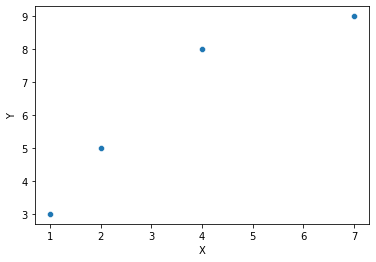

In [3]:
sns.scatterplot(x="X", y="Y",data=df)
plt.show()

In [4]:
#number of data
n = len(df)


# m parameter
m = 2
n

4

# Step 1: Initialize the data points into desired number of clusters randomly.

In [5]:
w = [[0.8,0.7,0.2,0.1],[0.2,0.3,0.8,0.9]]
w
C1=(w[0])
C2=(w[1])
print(X)
print(Y)
print(C1)
print(C2)

0    1
1    2
2    4
3    7
Name: X, dtype: int64
0    3
1    5
2    8
3    9
Name: Y, dtype: int64
[0.8, 0.7, 0.2, 0.1]
[0.2, 0.3, 0.8, 0.9]


In [6]:
table1 = pd.DataFrame(list(zip(X, Y,C1,C2)),columns =['X', 'Y','Cluster1','Cluster2'])
table1

,X,Y,Cluster1,Cluster2
0,1,3,0.8,0.2
1,2,5,0.7,0.3
2,4,8,0.2,0.8
3,7,9,0.1,0.9


# Step 2: Find out the centroid.

In [7]:
sum1=sum2=sum3=sum4=0.00

In [8]:
for i in range(n):
    cal1=(C1[i]**m)*X[i]
    sum1+=np.sum(cal1)
    C11=C1[i]**m
    sum3+=np.sum(C11)
    V11=sum1/sum3

for i in range(n):
    cal2=(C1[i]**m)*Y[i]
    sum2+=np.sum(cal2)
    C12=C1[i]**m
    sum4+=np.sum(C12)
    V12=sum2/sum4
print("centroid of cluster 1 is :" ,V11,  V12)

centroid of cluster 1 is : 1.5677966101694916 4.0508474576271185


In [9]:
sum5=sum6=sum7=sum8=0.00

In [10]:
for i in range(n):
    cal3=(C2[i]**m)*X[i]
    sum5+=np.sum(cal3)
    C13=C2[i]**m
    sum6+=np.sum(C13)
    V21=sum5/sum6

for i in range(n):
    cal4=(C2[i]**m)*Y[i]
    sum7+=np.sum(cal4)
    C14=C2[i]**m
    sum8+=np.sum(C14)
    V22=sum7/sum8
print("centroid of cluster 2 is :" ,V21,  V22)

centroid of cluster 2 is : 5.348101265822785 8.215189873417723


# Step 3: Find out the distance of each pointfrom centroid.

In [11]:
point1 = np.array((1, 3))
point2 = np.array((2, 5))
point3 = np.array((4, 8))
point4 = np.array((7, 9))
Centroid1=np.array((1.568, 4.051))
Centroid2=np.array((5.35, 8.215))
point =[point1,point1,point2,point2,point3,point3,point4,point4]
Centro= [Centroid1,Centroid2,Centroid1,Centroid2,Centroid1,Centroid2,Centroid1,Centroid2]
temp=[0]*8
for i in range(len(temp)):
    temp[i]=point[i]-Centro[i]   
dist=[0]*8
for i in range (len(dist)):
    dist[i]=np.sqrt(np.dot(temp[i].T, temp[i]))
    print (dist[i])  

1.1946652250735352
6.791076866005862
1.0427008199862506
4.643137409123274
4.637803898398465
1.3670131674566999
7.348416496089481
1.8272178304734226


# Step 4: Updating membership values

In [12]:
N= [dist[1],dist[0],dist[3],dist[2],dist[5],dist[4],dist[7],dist[6]]
O=[0]*8
for i in range(len(dist)):
    O[i]=(((dist[i]**2)/(dist[i]**2))+((dist[i]**2)/(N[i]**2)))**-1
    
for i in range(len(O)) :
    print('%.2f'% O[i])


0.97
0.03
0.95
0.05
0.08
0.92
0.06
0.94


In [13]:
O1=[O[0],O[2],O[4],O[6]]
O2=[O[1],O[3],O[5],O[7]]
df.insert(2, "Cluster 1", O1, True)
df.insert(3, "Cluster 2", O2 , True)
df.round(2)

,X,Y,Cluster 1,Cluster 2
0,1,3,0.97,0.03
1,2,5,0.95,0.05
2,4,8,0.08,0.92
3,7,9,0.06,0.94
